# Quantum annealing for Gotham City problem

Quantum annealing is a variation of the simulated thermal annealing approach for solving NP-hard optimization problems. 
D-Wave Systems created a full-stack framework ([Leap2](https://www.dwavesys.com/take-leap)) to run quantum annealing algorithms on both simulators and real quantum devices. The access to their systems uses an API mechanism for which registration is required. As part of the CDL, all users should have got a license and can access the real quantum devices. 
Follow the instructions [here](https://docs.ocean.dwavesys.com/en/stable/docs_cli.html) to set up your access via API to the D-Wave Systems.

For the simulation part, only requirement is the installation of the package [dwave-ocean-sdk](https://pypi.org/project/dwave-ocean-sdk/).

In the following we show how to build a graph for the UD-MIS problem and solve it by means of:
- simulated thermal annealing
- quantum annealing simulation
- quantum annealing on a real device

In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

# d'wave pkgs
import dimod
import dwave_networkx as dnx
from dwave_qbsolv import QBSolv

# pkgs to run the code on the QPU
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

Define a function to calculate the edges of the UD-MIS problem

In [2]:
def get_edges(graph):
    Nv = len(graph)
    edges = np.zeros((Nv, Nv))
    for i in range(Nv - 1):
        xi, yi = graph[i]
        for j in range(i + 1, Nv):
            xj, yj = graph[j]
            dij = np.sqrt((xi - xj) ** 2. + (yi - yj) ** 2.)
            if dij <= 1.0:
                edges[i, j] = 1
    return np.argwhere(edges == 1)

Define the graph for the UD-MIS problem. To build the graph, we use the networkx package. This is useful as the D-Wave library provides a wrapper to solve the MIS problem in this specific form.

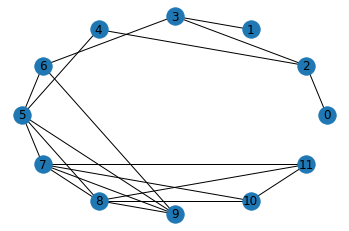

In [3]:
graph = [(1.19, 4.25), 
         (2.71, 3.48), 
         (1.19, 3.51), 
         (2, 3.38), 
         (1.12, 2.86), 
         (1.70, 2.42),
         (2.36, 2.54),
         (1.52, 1.48),
         (2.15, 1.54),
         (2.14, 1.87),
         (1.72, 0.86),
         (2.29, 0.87)
        ]

edges = get_edges(graph)

G = nx.Graph()
for edge in edges:
    G.add_edge(edge[0], edge[1])
    
# plot MIS nodes with different color
pos = nx.circular_layout(G)  # positions for all nodes

# nodes from MIS
nx.draw_networkx_nodes(G, pos)
# edges
nx.draw_networkx_edges(G, pos)
# labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
plt.axis("off")
plt.show()

Choose a sampler among:
1. simulated annealing sampler
2. quantum annealing simulator
3. quantum annealing on a quantum device (requires API token to Leap2 services)

by uncommenting the coresponding line.

In [4]:
# 1. the simulated annealing sampler
# sampler = dimod.SimulatedAnnealingSampler()  # Simulated annealing

# 2. the quantum simulator
# sampler = QBSolv()

# 3. running on the actual D-Wave QPU
sampler = EmbeddingComposite(DWaveSampler())

The set of maximum independent nodes is then obtained by calling the method maximum_independent_set from the dwave_networkx package:

In [5]:
indep_nodes = dnx.maximum_independent_set(G, sampler)

print(f'Independent nodes: {indep_nodes}')

Independent nodes: [0, 1, 4, 6, 8]


We now plot the solution by coloring in red the independent nodes:

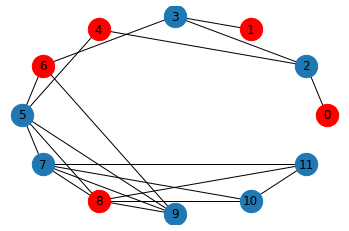

In [6]:
# plot MIS nodes with different color
pos = nx.circular_layout(G)  # positions for all nodes

# nodes from MIS
nx.draw_networkx_nodes(G, pos, nodelist=indep_nodes, node_size=500, node_color='red')
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in list(G.nodes) if n not in indep_nodes], node_size=500)
# edges
nx.draw_networkx_edges(G, pos)
# labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
plt.axis("off")
plt.show()

This solution corresponds to one of the degenerate solutions found with the simulated annealing code in python and the quantum annealing simulator in Julia.